✅ Dataset Loaded Successfully!
Shape of dataset: (301, 9)

First 5 rows:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

✅ Cleaned Data:
   Year  Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0  2014           3.35           5.59       27000    Petrol       Dealer   
1  2013           4.75           9.54       43000    Diesel       Dealer   
2  2017           7.25    

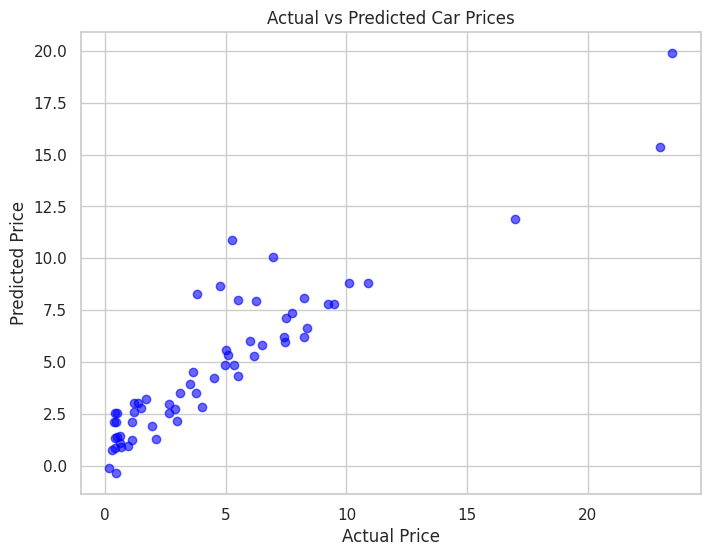


✅ Insights:
- Newer cars (higher Year) usually sell for higher prices.
- Higher Present Price (new value) strongly impacts Selling Price.
- Cars with more Driven_kms usually have lower resale value.
- This Linear Regression model gives a baseline prediction.


In [9]:
# 🚗 Car Price Prediction (CodeAlpha Task 3)

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


df = pd.read_csv("/content/sample_data/CarPrice.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Step 3: Select Important Columns
# Your dataset has these columns: Car_Name, Year, Selling_Price, Present_Price, Driven_kms, etc.
df = df.drop('Car_Name', axis=1).dropna()


print("\n✅ Cleaned Data:")
print(df.head())

# Step 4: Features & Target
X = df[['Year', 'Present_Price', 'Driven_kms']]   # Features
y = df['Selling_Price']                           # Target

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

print("\n✅ Model Trained Successfully!")

# Step 7: Predictions
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10]
})
print("\nFirst 10 Predictions vs Actual Prices:\n", comparison)

# Step 8: Evaluation
print("\n📊 Model Performance Metrics:")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)

# Step 9: Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

# Step 10: Insights
print("\n✅ Insights:")
print("- Newer cars (higher Year) usually sell for higher prices.")
print("- Higher Present Price (new value) strongly impacts Selling Price.")
print("- Cars with more Driven_kms usually have lower resale value.")
print("- This Linear Regression model gives a baseline prediction.")